In [3]:
import math
import random
import matplotlib.pyplot as plt

# 유전 알고리즘 매개변수
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1

# 각 제품의 최소 및 최대 가격
MIN_PRICE = 1
MAX_PRICE = 1000

# 각 제품의 수
NUM_PRODUCTS = 5

def profit(x):
    x = [round(val) for val in x]  # convert x into integer
    s = sales(x)  # get the expected sales
    c = cost(s)  # get the expected cost
    profit_val = sum([val[0] * val[1] - val[2] for val in zip(s, x, c)])  # compute the profit
    return profit_val

def cost(units, A=100, cpu=lambda units: [35 - 5 * i for i in range(1, len(units) + 1)]):
    return [A + cpu_val * unit for cpu_val, unit in zip(cpu(units), units)]

def sales(x, A=1000, B=200, C=141, m=None):
    if m is None:
        m = [2 - 0.25 * i for i in range(1, len(x) + 1)]
    return [round(marketing * (A / math.log(price + B) - C)) for price, marketing in zip(x, m)]

# 유전 알고리즘을 위한 초기 개체 생성
def generate_individual():
    return [random.randint(MIN_PRICE, MAX_PRICE) for _ in range(NUM_PRODUCTS)]

# 유전 알고리즘을 위한 초기 개체군 생성
population = [generate_individual() for _ in range(POPULATION_SIZE)]

# 평균 및 최대 이익값 저장을 위한 리스트 초기화
average_profits = []
max_profits = []

# 유전 알고리즘을 이용한 최적화
for generation in range(GENERATIONS):
    # 적합도 평가
    fitness_scores = [profit(individual) for individual in population]

    # 평균 및 최대 이익값 저장
    average_profit = sum(fitness_scores) / len(fitness_scores)
    max_profit = max(fitness_scores)
    average_profits.append(average_profit)
    max_profits.append(max_profit)
    
    # 다음 세대 개체 생성
    next_generation = []

    # 엘리트 선택: 최고 적합도를 가진 개체를 다음 세대로 복사
    elite_index = fitness_scores.index(max(fitness_scores))
    next_generation.append(population[elite_index])

    # 선택과 교차 (룰렛 휠 선택과 1점 교차를 사용할 수 있음)
    while len(next_generation) < POPULATION_SIZE:
        parent1 = random.choices(population, weights=fitness_scores)[0]
        parent2 = random.choices(population, weights=fitness_scores)[0]
        crossover_point = random.randint(1, NUM_PRODUCTS - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        next_generation.append(child)

    # 돌연변이
    for individual in next_generation:
        if random.random() < MUTATION_RATE:
            gene_to_mutate = random.randint(0, NUM_PRODUCTS - 1)
            individual[gene_to_mutate] = random.randint(MIN_PRICE, MAX_PRICE)

    # 다음 세대로 업데이트
    population = next_generation

# 최적의 해 출력
best_individual = max(population, key=profit)
print("최적의 제품 가격:", best_individual)
print("최적의 이익:", profit(best_individual))

최적의 제품 가격: [429, 425, 452, 469, 381]
최적의 이익: 35973


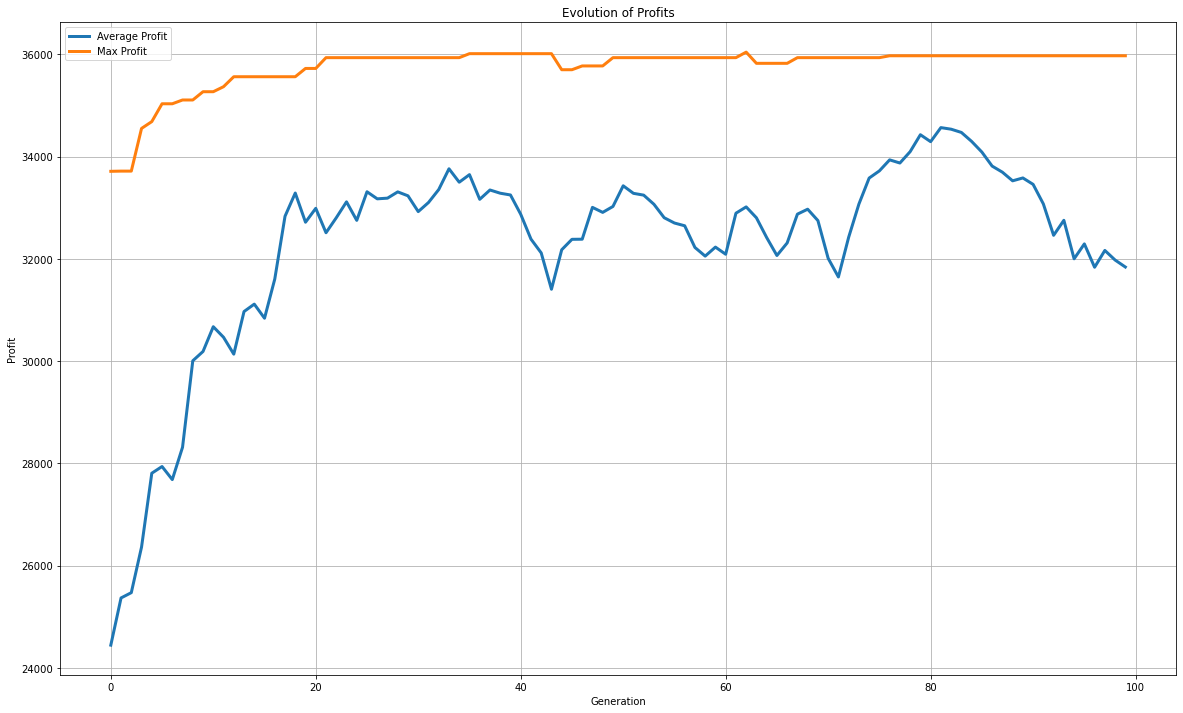

In [4]:
# 평균 및 최대 이익값 시각화
plt.figure(figsize=(20, 12))
plt.plot(range(GENERATIONS), average_profits, label='Average Profit', linewidth = 3)
plt.plot(range(GENERATIONS), max_profits, label='Max Profit', linewidth = 3)
plt.xlabel('Generation')
plt.ylabel('Profit')
plt.title('Evolution of Profits')
plt.legend()
plt.grid(True)
plt.show()

최적의 해: [-0.733320100091615, -0.820752433250103]
최적의 적합도: 1.554072533341718


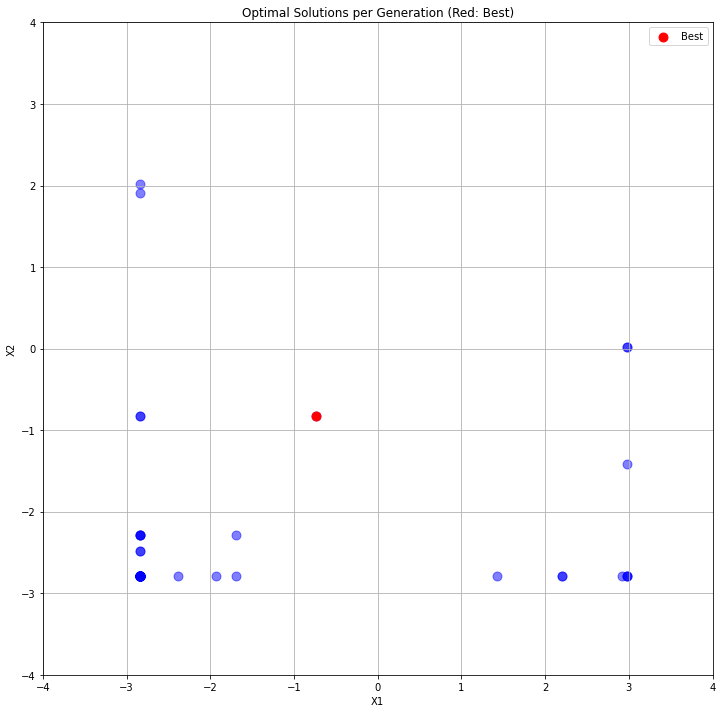

In [117]:
import random
import matplotlib.pyplot as plt

# 유전 알고리즘 매개변수
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1

# x1, x2의 범위
MIN_X = -3
MAX_X = 3

# 이익 함수 정의
def fitness(x):
    return abs(x[0]) + abs(x[1])

# 유전 알고리즘을 위한 초기 개체 생성
def generate_individual():
    return [random.uniform(MIN_X, MAX_X) for _ in range(2)]

# 유전 알고리즘을 위한 초기 개체군 생성
population = [generate_individual() for _ in range(POPULATION_SIZE)]

# 유전 알고리즘을 이용한 최적화
for generation in range(GENERATIONS):
    # 적합도 평가
    fitness_scores = [fitness(individual) for individual in population]

    # 다음 세대 개체 생성
    next_generation = []

    # 선택과 교차 (룰렛 휠 선택과 1점 교차를 사용할 수 있음)
    while len(next_generation) < POPULATION_SIZE:
        parent1 = random.choices(population, weights=fitness_scores)[0]
        parent2 = random.choices(population, weights=fitness_scores)[0]
        child = [random.choice([parent1[i], parent2[i]]) for i in range(2)]
        next_generation.append(child)

    # 돌연변이
    for individual in next_generation:
        if random.random() < MUTATION_RATE:
            gene_to_mutate = random.randint(0, 1)
            individual[gene_to_mutate] = random.uniform(MIN_X, MAX_X)

    # 다음 세대로 업데이트
    population = next_generation

# 최적의 해 출력
best_individual = min(population, key=fitness)
print("최적의 해:", best_individual)
print("최적의 적합도:", fitness(best_individual))

# 산점도를 위한 데이터 수집
x1_values = []
x2_values = []
y_values = []
for individual in population:
    x1_values.append(individual[0])
    x2_values.append(individual[1])
    y_values.append(individual[0] + individual[1])

# 산점도 그리기
plt.figure(figsize=(12, 12))
plt.scatter(x1_values, x2_values, c='blue', alpha=0.5, s = 80)
plt.scatter(best_individual[0], best_individual[1], color='red', label='Best', s = 80)
plt.xlabel('X1')
plt.ylabel('X2')

# x축과 y축의 범위를 고정하여 중앙에 위치시킴
plt.xlim(MIN_X-1, MAX_X+1)
plt.ylim(MIN_X-1, MAX_X+1)

plt.title('Optimal Solutions per Generation (Red: Best)')
plt.legend()
plt.grid(True)
plt.show()